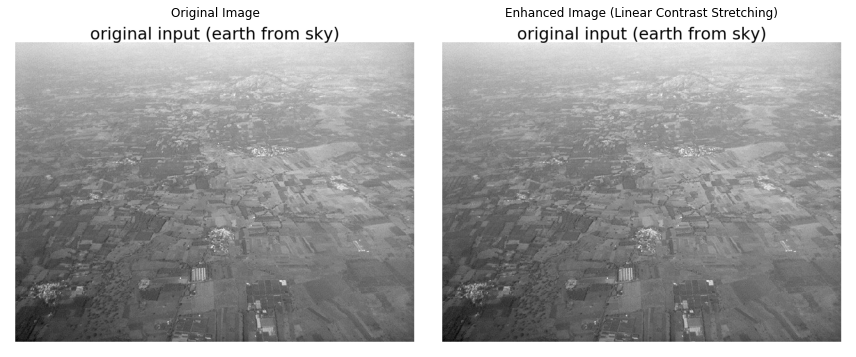

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure 

img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//Original_earth_from_sky.png")

original_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Perform linear contrast stretching using scikit-image
enhanced_image = exposure.rescale_intensity(original_image_rgb)

# Step 3: Display the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image (Linear Contrast Stretching)")
plt.imshow(enhanced_image)
plt.axis('off')

plt.tight_layout()
plt.show()

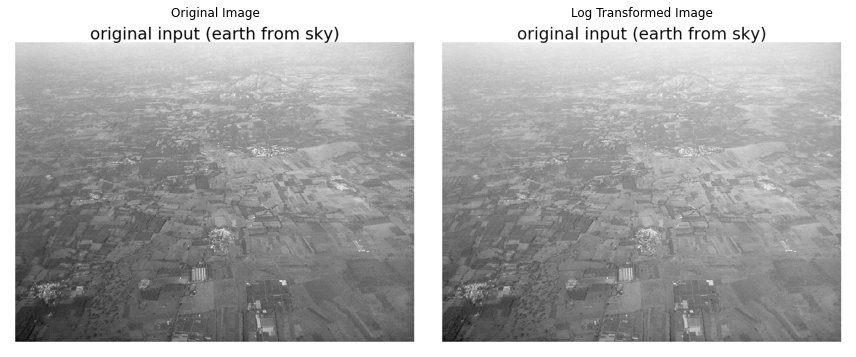

In [3]:
image_path = r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//Original_earth_from_sky.png"
original_image = cv2.imread(image_path)

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Step 3: Perform the log transformation
log_transformed_image = exposure.adjust_log(gray_image)

# Step 4: Display the original and transformed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Log Transformed Image")
plt.imshow(log_transformed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

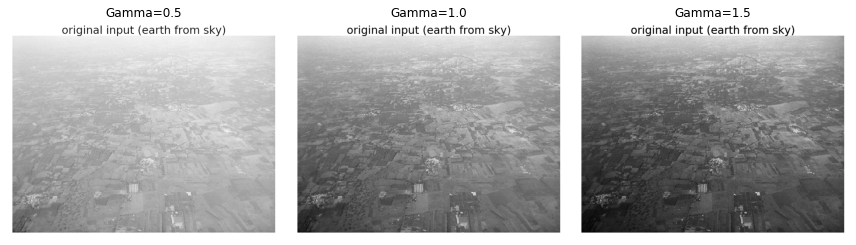

In [4]:
# Step 1: Read the image and convert to grayscale
image_path = r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//Original_earth_from_sky.png"
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Step 2: Take gamma values as input from the user
gamma_values = [0.5, 1.0, 1.5]  

# Step 3: Perform the power-law (gamma) transformation for each gamma value
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(gamma_values):
    power_transformed_image = exposure.adjust_gamma(gray_image, gamma=gamma)
    
    plt.subplot(1, len(gamma_values), i+1)
    plt.title(f"Gamma={gamma}")
    plt.imshow(power_transformed_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

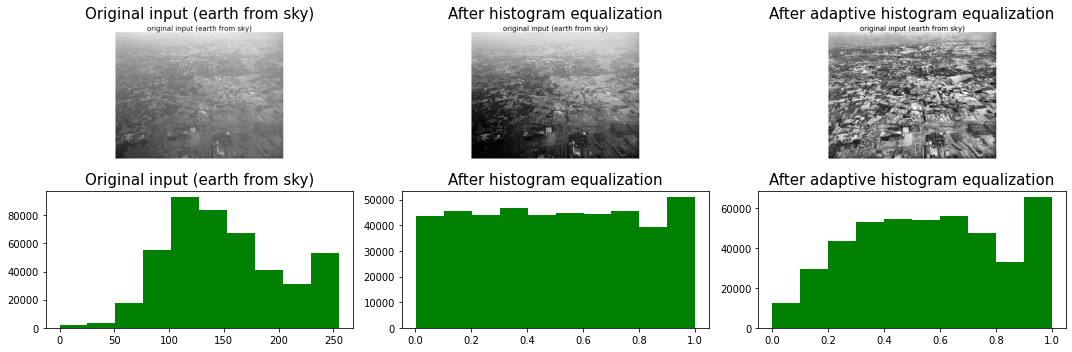

In [5]:
image_path = r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//Original_earth_from_sky.png"
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization and adaptive histogram equalization
img_eq = exposure.equalize_hist(gray_image)
img_adapteq = exposure.equalize_adapthist(gray_image, clip_limit=0.03)

# Create a list of images and titles
images = [gray_image, img_eq, img_adapteq]
titles = ['Original input (earth from sky)', 'After histogram equalization', 'After adaptive histogram equalization']

# Display images and histograms
plt.figure(figsize=(15, 5))

# Display images
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], size=15)
    plt.axis('off')

# Display histograms
for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.hist(images[i].ravel(), color='g')
    plt.title(titles[i], size=15)

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/shoumikdaterao/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


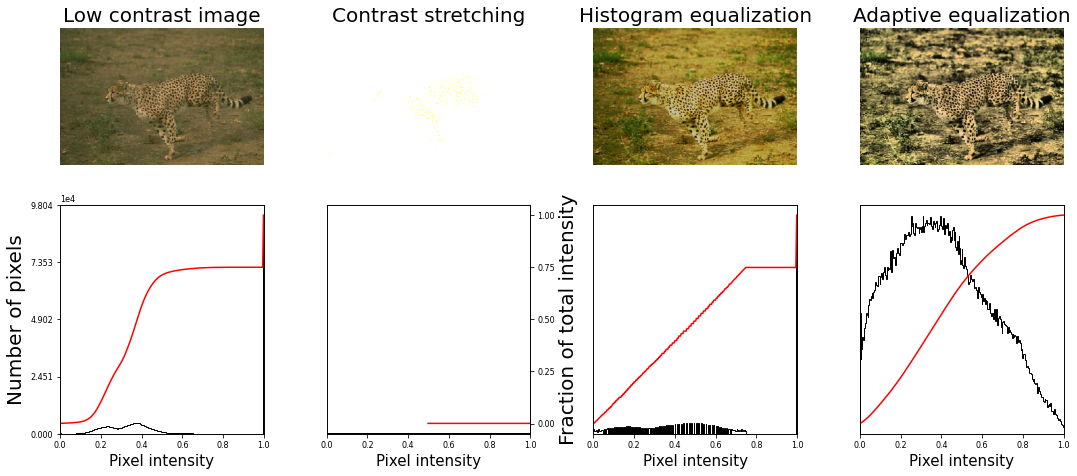

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, io, img_as_float

plt.rcParams['font.size'] = 8

def plot_image_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    axes_image, axes_hist = axes
    axes_cdf = axes_hist.twinx()
    axes_image.imshow(image, cmap=plt.cm.gray)
    axes_image.set_axis_off()
    axes_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    axes_hist.set_xlim(0, 1)
    axes_hist.set_xlabel('Pixel intensity', size=15)
    axes_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    axes_hist.set_yticks([])
    image_cdf, bins = exposure.cumulative_distribution(image, bins)
    axes_cdf.plot(bins, image_cdf, 'r')
    axes_cdf.set_yticks([])
    return axes_image, axes_hist, axes_cdf

im = io.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//leopard.png")

# Contrast stretching
im_rescale = exposure.rescale_intensity(im, in_range=(0, 100), out_range=(0, 255))
im_eq = exposure.equalize_hist(im)  # Histogram equalization
im_adapteq = exposure.equalize_adapthist(im, clip_limit=0.03)  # Adaptive histogram equalization

fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes_image, axes_hist, axes_cdf = plot_image_and_hist(im, (axes[:, 0]))
axes_image.set_title('Low contrast image', size=20)
y_min, y_max = axes_hist.get_ylim()
axes_hist.set_ylabel('Number of pixels', size=20)
axes_hist.set_yticks(np.linspace(0, y_max, 5))

for i, image in enumerate([im_rescale, im_eq, im_adapteq]):
    axes_image, axes_hist, axes_cdf = plot_image_and_hist(image, (axes[:, i + 1]))
    titles = ['Contrast stretching', 'Histogram equalization', 'Adaptive equalization']
    axes_image.set_title(titles[i], size=20)
    if i == 0:
        axes_cdf.set_ylabel('Fraction of total intensity', size=20)
        axes_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show()